In [3]:
import pandas as pd

In [4]:
one=pd.read_csv('https://raw.githubusercontent.com/AkankshaKumari-akuu/N-WTrafficClassification/refs/heads/main/output1.csv')

In [5]:
two=pd.read_csv('https://raw.githubusercontent.com/AkankshaKumari-akuu/N-WTrafficClassification/refs/heads/main/Midterm_53_group.csv')

In [6]:
two

,Time,Source,No.,Destination,Protocol,Length,Info
0,0.000000,192.167.8.166,1,192.167.255.255,NBNS,92,Name query NB WPAD<00>
1,0.784682,192.167.8.166,2,192.167.255.255,NBNS,92,Name query NB WPAD<00>
2,1.169060,VMware_8a:5c:e6,3,Broadcast,ARP,60,Who has 192.167.7.175? Tell 192.167.0.1
3,2.167949,VMware_8a:5c:e6,4,Broadcast,ARP,60,Who has 192.167.7.175? Tell 192.167.0.1
4,3.170095,VMware_8a:5c:e6,5,Broadcast,ARP,60,Who has 192.167.7.175? Tell 192.167.0.1
...,...,...,...,...,...,...,...
394131,1255.897236,192.167.7.162,394132,192.167.7.164,ICMP,98,"Echo (ping) request id=0x6592, seq=1177/39172..."
394132,1255.897921,192.167.7.164,394133,192.167.7.162,ICMP,98,"Echo (ping) reply id=0x6592, seq=1177/39172..."
394133,1255.993209,192.167.7.162,394134,142.250.190.97,TCP,74,[TCP Retransmission] [TCP Port numbers reused]...
394134,1256.921232,192.167.7.162,394135,192.167.7.164,ICMP,98,"Echo (ping) request id=0x6592, seq=1178/39428..."


In [7]:
two.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394136 entries, 0 to 394135
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Time         394136 non-null  float64
 1   Source       394136 non-null  object 
 2   No.          394136 non-null  int64  
 3   Destination  394136 non-null  object 
 4   Protocol     394136 non-null  object 
 5   Length       394136 non-null  int64  
 6   Info         394136 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 21.0+ MB


In [8]:
two.isna().sum()

Time           0
Source         0
No.            0
Destination    0
Protocol       0
Length         0
Info           0
dtype: int64

In [9]:
import matplotlib.pyplot as plt

In [10]:
diff_protocal = two['Protocol'].value_counts()

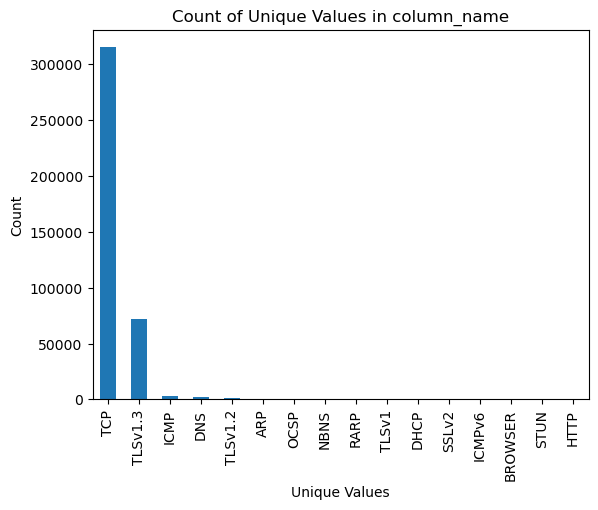

In [11]:
diff_protocal.plot(kind='bar')

plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.title('Count of Unique Values in column_name')

plt.show()

In [12]:
diff_protocal

Protocol
TCP        314873
TLSv1.3     71625
ICMP         2690
DNS          1999
TLSv1.2      1763
ARP           447
OCSP          258
NBNS          231
RARP          178
TLSv1          20
DHCP           17
SSLv2          11
ICMPv6          9
BROWSER         8
STUN            4
HTTP            3
Name: count, dtype: int64

In [13]:
import seaborn as sns

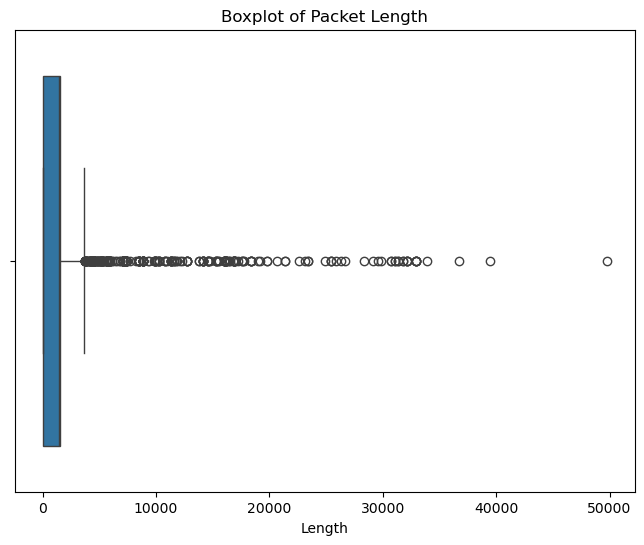

In [14]:
# Set plot size
plt.figure(figsize=(8, 6))

# Create a boxplot for the 'Length' column
sns.boxplot(data=two, x='Length')

# Set title and labels
plt.title('Boxplot of Packet Length')
plt.xlabel('Length')

# Show the plot
plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [16]:
# Step 3: Normalize the 'Length' column
data=two
scaler = StandardScaler()
data['Length'] = scaler.fit_transform(data[['Length']])

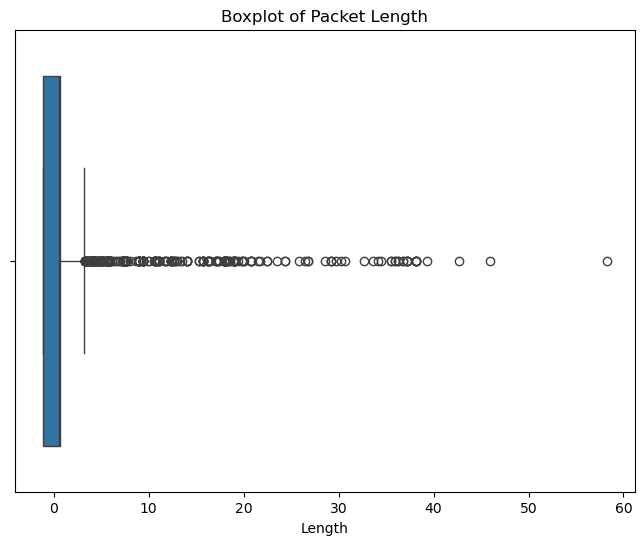

In [17]:
# Set plot size
plt.figure(figsize=(8, 6))

# Create a boxplot for the 'Length' column
sns.boxplot(data=two, x='Length')

# Set title and labels
plt.title('Boxplot of Packet Length')
plt.xlabel('Length')

# Show the plot
plt.show()

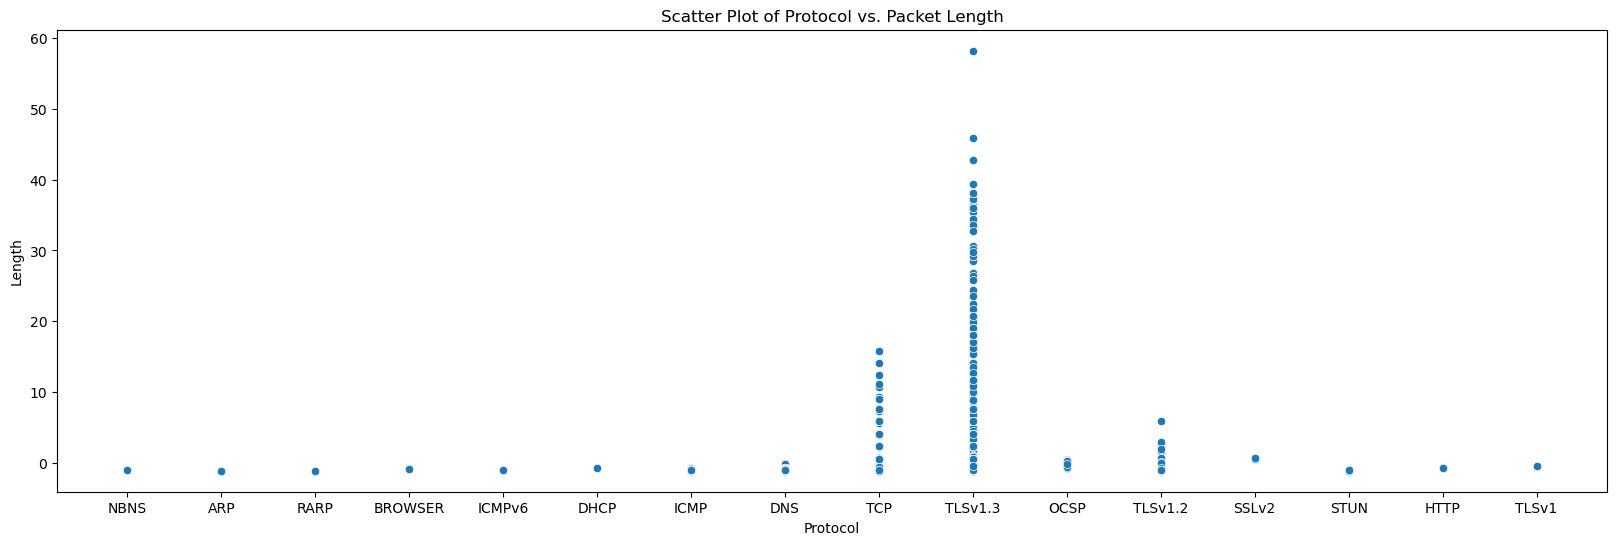

In [18]:
# Set plot size
plt.figure(figsize=(20, 6))

# Create a scatter plot for 'Protocol' vs 'Length'
sns.scatterplot(data=data, x='Protocol', y='Length')

# Set title and labels
plt.title('Scatter Plot of Protocol vs. Packet Length')
plt.xlabel('Protocol')
plt.ylabel('Length')

# Show the plot
plt.show()

In [19]:
#Tlsv protocal have large packet size

In [20]:
data.head()

,Time,Source,No.,Destination,Protocol,Length,Info
0,0.000000,192.167.8.166,1,192.167.255.255,NBNS,-1.067123,Name query NB WPAD<00>
1,0.784682,192.167.8.166,2,192.167.255.255,NBNS,-1.067123,Name query NB WPAD<00>
2,1.169060,VMware_8a:5c:e6,3,Broadcast,ARP,-1.105338,Who has 192.167.7.175? Tell 192.167.0.1
3,2.167949,VMware_8a:5c:e6,4,Broadcast,ARP,-1.105338,Who has 192.167.7.175? Tell 192.167.0.1
4,3.170095,VMware_8a:5c:e6,5,Broadcast,ARP,-1.105338,Who has 192.167.7.175? Tell 192.167.0.1


In [21]:
diff_Destination_ip = two['Destination'].value_counts()

In [22]:
diff_Destination_ip.count()

308

In [23]:
diff_Destination_ip.head(10)

Destination
192.167.7.162      276849
104.91.166.75       15565
23.33.29.79         10538
74.125.9.169         6800
173.194.133.202      6451
146.75.78.73         6116
104.91.166.113       5200
192.232.16.76        4514
192.232.16.205       4274
108.156.172.107      3811
Name: count, dtype: int64

In [24]:
diff_Source_ip = two['Source'].value_counts()

In [25]:
diff_Source_ip.head(10)

Source
192.167.7.162      116067
104.91.166.75       57238
74.125.9.169        37085
23.33.29.79         25918
173.194.133.202     22832
104.91.166.113      18222
192.232.16.76       15245
108.156.172.107     10986
192.232.16.205       8076
146.75.78.73         6254
Name: count, dtype: int64

In [26]:
label_encoder = LabelEncoder()
data['Protocol'] = label_encoder.fit_transform(data['Protocol'])

In [27]:
lvl_enc_protocol = data['Protocol'].value_counts()
lvl_enc_protocol

Protocol
12    314873
15     71625
5       2690
3       1999
14      1763
0        447
8        258
7        231
9        178
13        20
2         17
10        11
6          9
1          8
11         4
4          3
Name: count, dtype: int64

In [28]:
data['Source'] = label_encoder.fit_transform(data['Source'])
data['Destination'] = label_encoder.fit_transform(data['Destination'])

In [29]:
data.head()

,Time,Source,No.,Destination,Protocol,Length,Info
0,0.000000,183,1,152,7,-1.067123,Name query NB WPAD<00>
1,0.784682,183,2,152,7,-1.067123,Name query NB WPAD<00>
2,1.169060,347,3,303,0,-1.105338,Who has 192.167.7.175? Tell 192.167.0.1
3,2.167949,347,4,303,0,-1.105338,Who has 192.167.7.175? Tell 192.167.0.1
4,3.170095,347,5,303,0,-1.105338,Who has 192.167.7.175? Tell 192.167.0.1


In [44]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0)

In [31]:
data_subset = data[['Source', 'Destination', 'Protocol', 'Length']]

In [45]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
# Step 3: Sample the data (optional)
sample_size = int(0.1 * len(data))  # Sample 10%
data_sample = data_subset.sample(n=sample_size, random_state=0)

# Step 4: Hierarchical Clustering using Agglomerative Clustering
num_clusters = 5
agglo = AgglomerativeClustering(n_clusters=num_clusters)
agglo_labels = agglo.fit_predict(data_sample)

In [33]:
# Step 5: Use K-means to refine clusters based on hierarchical results
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(data_sample)
kmeans_labels = kmeans.labels_

In [34]:
# Optional: Combine the labels from both methods
data_sample['Agglomerative Cluster'] = agglo_labels
data_sample['K-means Cluster'] = kmeans_labels

In [35]:
from sklearn.decomposition import PCA
# Step 6: Visualize the clusters using PCA for dimensionality reduction
pca = PCA(n_components=3)
reduced_features = pca.fit_transform(data_sample)

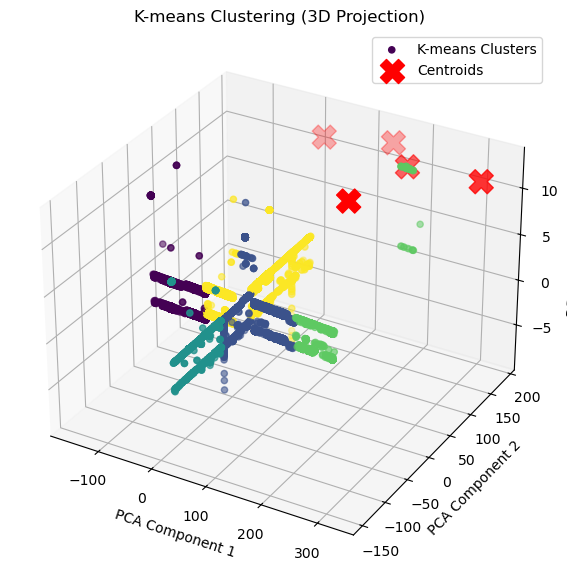

In [36]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(reduced_features[:, 0], reduced_features[:, 1], reduced_features[:, 2],
                     c=kmeans_labels, cmap='viridis', marker='o', label='K-means Clusters')

# Plot centroids
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
           kmeans.cluster_centers_[:, 2], s=300, c='red', marker='X', label='Centroids')

# Labels and title
ax.set_title('K-means Clustering (3D Projection)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.legend()
plt.show()

In [37]:
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(data_sample)

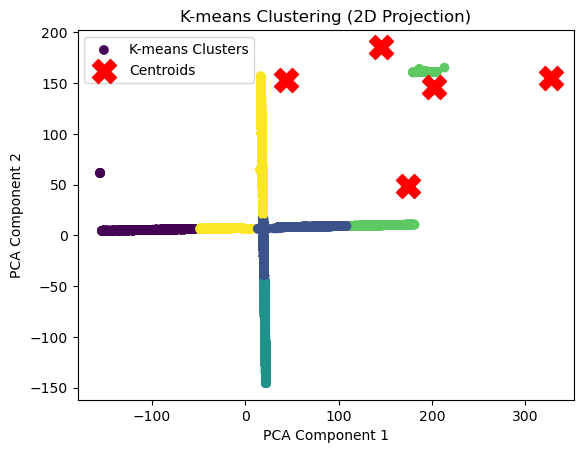

In [38]:
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=kmeans_labels, cmap='viridis', marker='o', label='K-means Clusters')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('K-means Clustering (2D Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

In [43]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
# Step 3: Sample the data (optional)
sample_size = int(0.1 * len(data))  # Sample 10%
data_sample = data_subset.sample(n=sample_size, random_state=0)

# Step 4: Hierarchical Clustering using Agglomerative Clustering
num_clusters = 5
agglo = AgglomerativeClustering(n_clusters=num_clusters)
agglo_labels = agglo.fit_predict(data_sample)

In [40]:
# Step 3: Apply Hierarchical Clustering
num_clusters = 4
agglo = AgglomerativeClustering(n_clusters=num_clusters)
agglo_labels = agglo.fit_predict(data_sample)

In [41]:
# Step 4: Use K-means to refine clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(data_sample)
kmeans_labels = kmeans.labels_

In [42]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
# Step 5: Merge the results
data_sample['Agglomerative Cluster'] = agglo_labels
data_sample['K-means Cluster'] = kmeans_labels

# Optional: Create a combined label for voting or analysis
data_sample['Final Cluster'] = np.where(data['Agglomerative Cluster'] == data['K-means Cluster'],data['Agglomerative Cluster'],-1)  # -1 for points that differ

# Optional: Visualize the clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions
reduced_features = pca.fit_transform(features)

plt.figure(figsize=(10, 7))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=data['Final Cluster'], cmap='viridis', marker='o', label='Final Clusters')
plt.title('Merged Clusters Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()


KeyError: 'Agglomerative Cluster'